In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sie import *
from sie.mcmc import *

## Fit a coin flip model

In [3]:
h,N=data=17,25

In [4]:
def P_data(data,theta):
    h,N=data
    distribution=Bernoulli(h,N)
    return distribution(theta)

In [5]:
model=MCMCModel(data,P_data,
                theta=Uniform(0,1))

Sampling Prior...
Done.
0.17 s
Running MCMC...
Done.
0.83 s


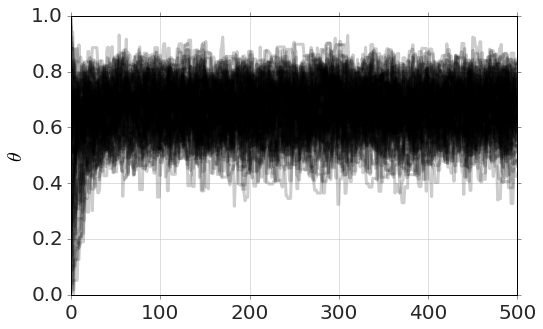

In [6]:
model.run_mcmc(500)
model.plot_chains()

### run a bit longer...

Running MCMC...
Done.
0.78 s


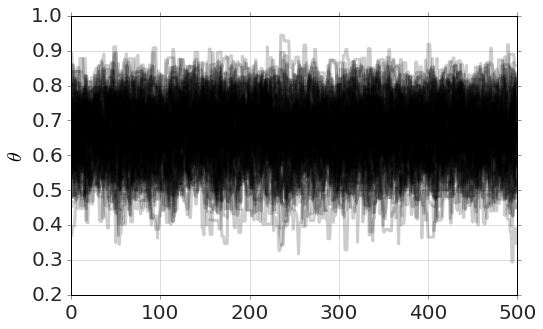

In [7]:
model.run_mcmc(500)
model.plot_chains()

### Plot the MCMC distribution of $\theta$ and the Beta distribution solution

Hint: they should be the same

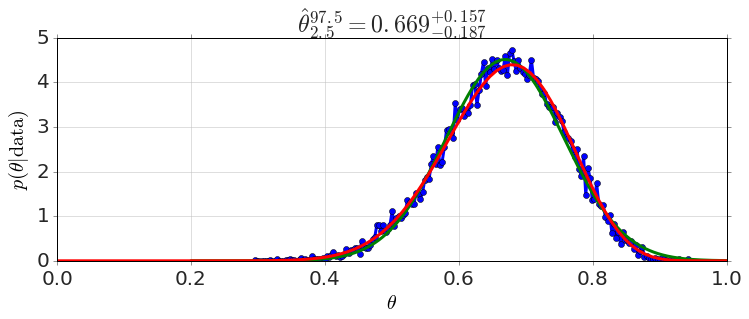

In [8]:
model.plot_distributions()

dist=coinflip(h,N)
x=linspace(0,1.0,100)
px=dist.pdf(x)
plot(x,px,'r-')

### Look at some probabilitiess

In [9]:
model.P('theta>0.5')

0.96173333333333333

In [10]:
model.P('(0.2<theta) & (theta<.5)')

0.038266666666666664

## Regression Example

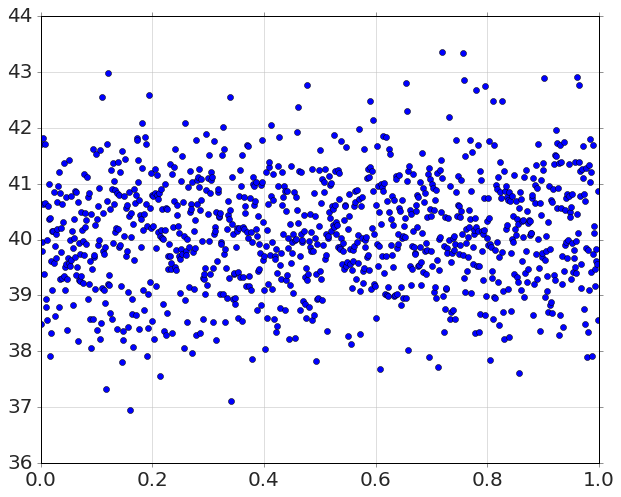

In [78]:
N=1000
x=arange(N)/1000.0
y=randn(N)+40+.25*x
plot(x,y,'o')

Sampling Prior...
Done.
0.21 s
Running MCMC...
Done.
1.39 s


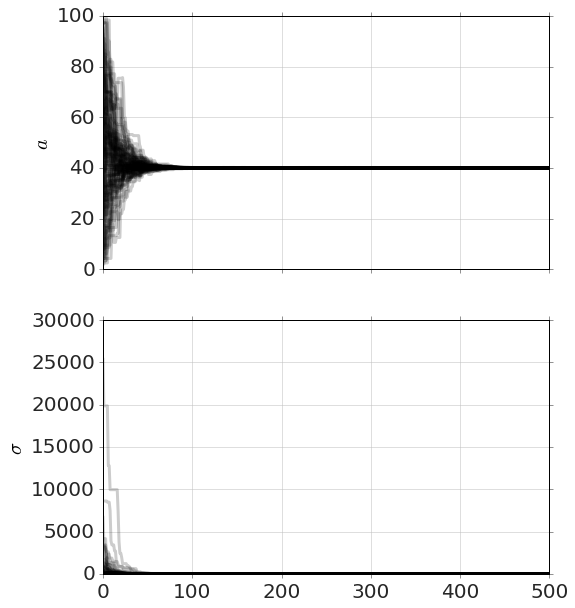

In [79]:
def constant(x,a):
    return a

model=MCMCModel_Regression(x,y,constant,
            a=Uniform(0,100),
            )
model.run_mcmc(500)
model.plot_chains()

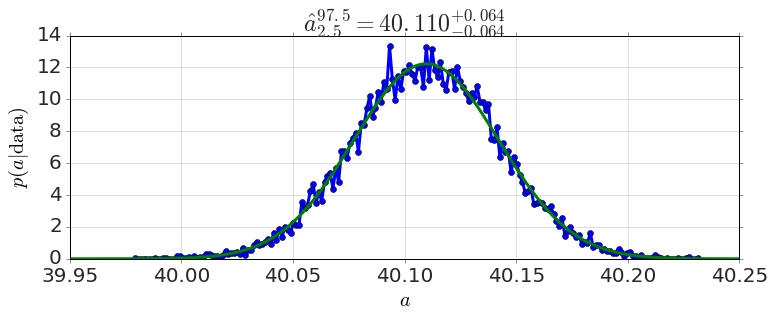

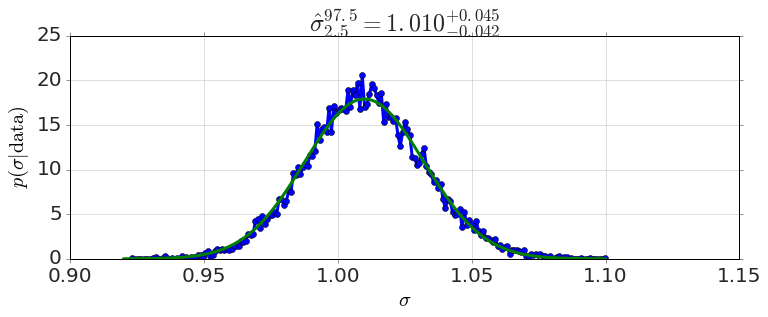

In [80]:
model.plot_distributions()

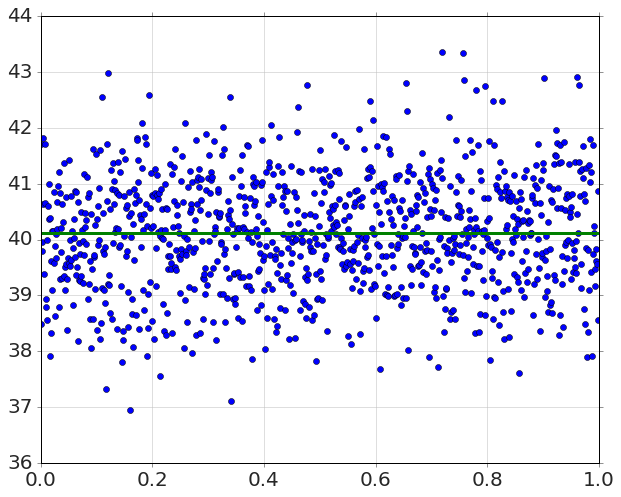

In [81]:
plot(x,y,'o')

xfit=linspace(min(x),max(x),200)
yfit=model.predict(xfit)

plot(xfit,yfit,'-')

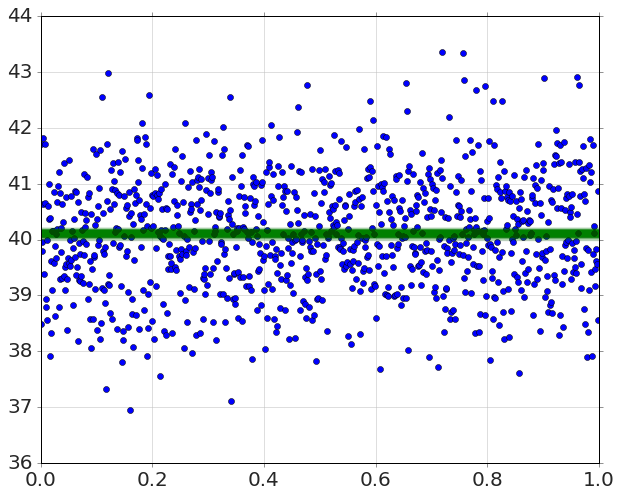

In [82]:
plot(x,y,'o')
model.plot_predictions(xfit,color='g')

## Linear Model

Sampling Prior...
Done.
0.26 s
Running MCMC...
Done.
1.60 s


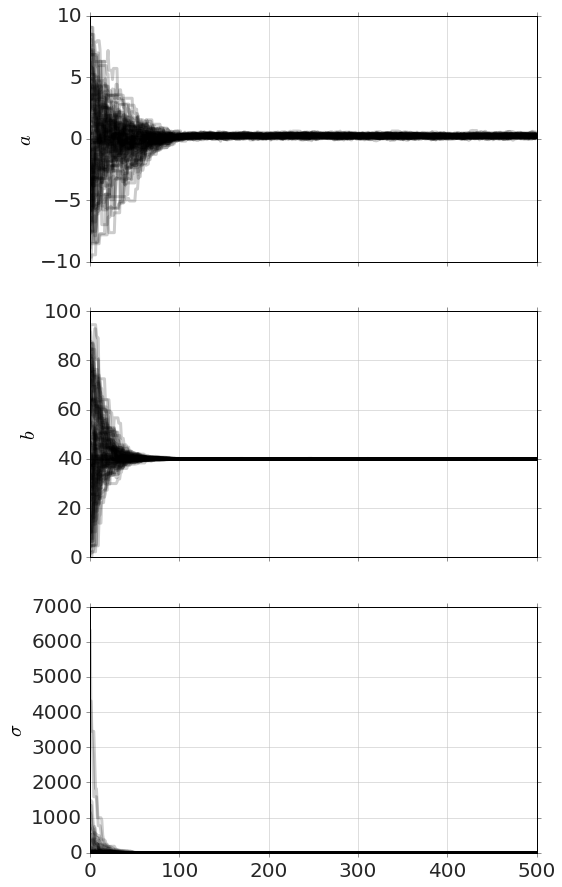

In [83]:
def linear(x,a,b):
    return a*x+b

model=MCMCModel_Regression(x,y,linear,
                a=Uniform(-10,10),
                b=Uniform(0,100),
                )

model.run_mcmc(500)
model.plot_chains()

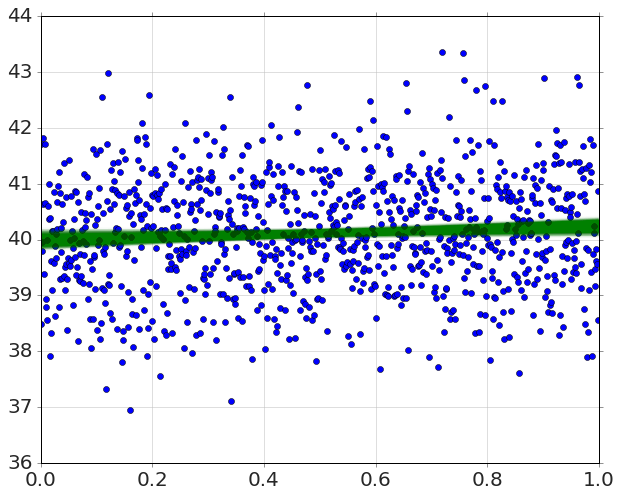

In [84]:
plot(x,y,'o')
model.plot_predictions(xfit,color='g')

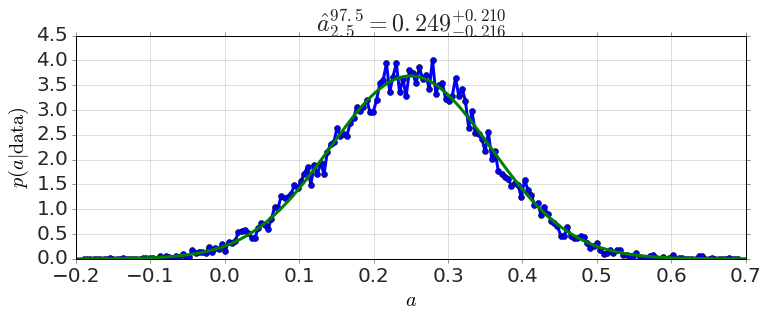

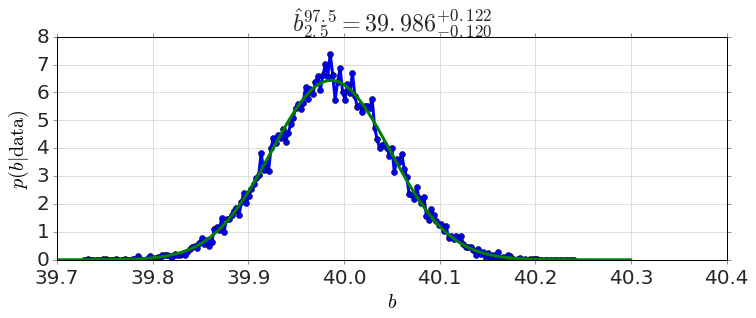

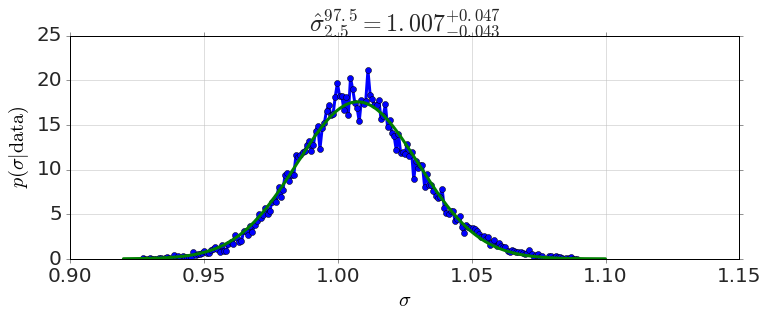

In [85]:
model.plot_distributions()

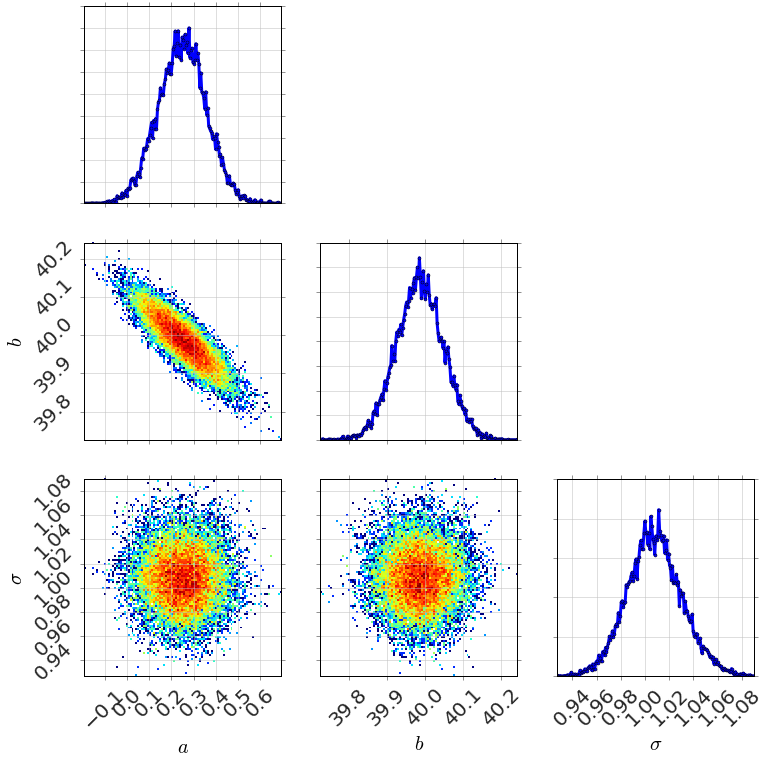

In [86]:
model.triangle_plot()

In [87]:
model.percentiles([5,50,95])

{'_sigma': array([ 0.97143798,  1.00744104,  1.0467333 ]),
 'a': array([ 0.07063144,  0.24939562,  0.42523751]),
 'b': array([ 39.88446461,  39.98633744,  40.09010139])}

In [88]:
model.P('a>0')

0.98936000000000002